# Univariate Feature Selection.

## Select K Best - chi score.


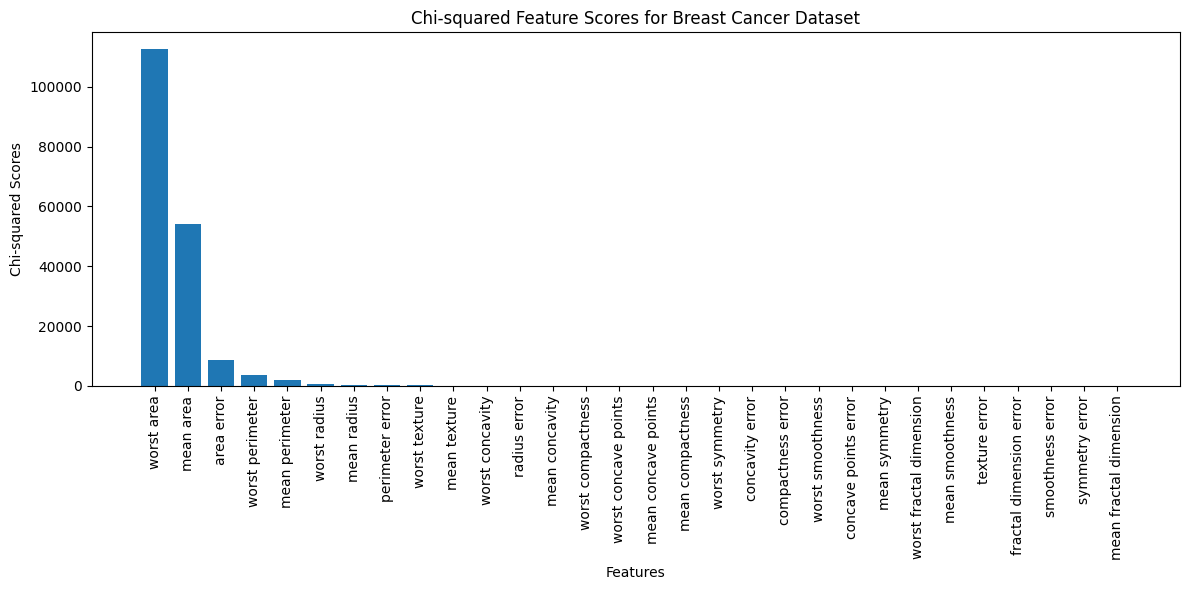

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, chi2

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Create an instance of SelectKBest with chi2 scoring and specify k
k_best = SelectKBest(score_func=chi2, k=5)  # You can adjust the value of 'k' as needed

# Fit SelectKBest on the dataset
k_best.fit(X, y)

# Get the indices of the selected features
selected_feature_indices = np.where(k_best.get_support())[0]
# Create a bar chart to visualiz e feature scores
feature_scores =k_best.scores_
feature_names = data.feature_names
sorted_indices = np.argsort(feature_scores)[::-1]
sorted_feature_scores = feature_scores[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_feature_scores)), sorted_feature_scores, tick_label=sorted_feature_names)
plt.xlabel('Features')
plt.ylabel('Chi-squared Scores')
plt.title('Chi-squared Feature Scores for Breast Cancer Dataset')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

In [4]:
# Create a dataframe to store feature names and chi-squared values
feature_df = pd.DataFrame({'Feature': feature_names, 'Chi-Squared Value': feature_scores})

# Sort the dataframe by chi-squared values in descending order
feature_df = feature_df.sort_values(by='Chi-Squared Value', ascending=False)

# Print the dataframe
print(feature_df)


                    Feature  Chi-Squared Value
23               worst area      112598.431564
3                 mean area       53991.655924
13               area error        8758.504705
22          worst perimeter        3665.035416
2            mean perimeter        2011.102864
20             worst radius         491.689157
0               mean radius         266.104917
12          perimeter error         250.571896
21            worst texture         174.449400
1              mean texture          93.897508
26          worst concavity          39.516915
10             radius error          34.675247
6            mean concavity          19.712354
25        worst compactness          19.314922
27     worst concave points          13.485419
7       mean concave points          10.544035
5          mean compactness           5.403075
28           worst symmetry           1.298861
16          concavity error           1.044718
15        compactness error           0.613785
24         wo

## SelectkBest-mutual info classifier.

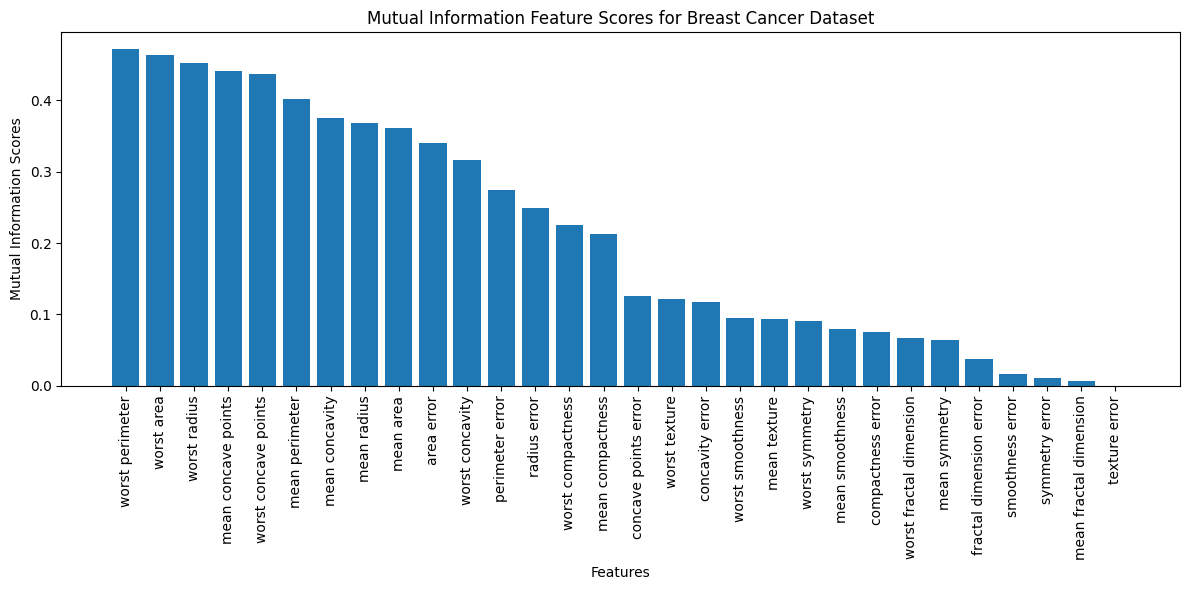

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Create an instance of SelectKBest with mutual information scoring and specify k
k_best = SelectKBest(score_func=mutual_info_classif, k=5)  # You can adjust the value of 'k' as needed

# Fit SelectKBest on the dataset
k_best.fit(X, y)

# Get the indices of the selected features
selected_feature_indices = np.where(k_best.get_support())[0]

# Get the feature names and mutual information scores
feature_names = data.feature_names
feature_scores = k_best.scores_

# Create a dataframe to store feature names and mutual information scores
feature_df = pd.DataFrame({'Feature': feature_names, 'Mutual Information': feature_scores})

# Sort the dataframe by mutual information scores in descending order
feature_df = feature_df.sort_values(by='Mutual Information', ascending=False)

# Create a bar chart to visualize feature scores
plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_df)), feature_df['Mutual Information'])
plt.xlabel('Features')
plt.ylabel('Mutual Information Scores')
plt.title('Mutual Information Feature Scores for Breast Cancer Dataset')
plt.xticks(range(len(feature_df)), feature_df['Feature'], rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

## For Regression Task.

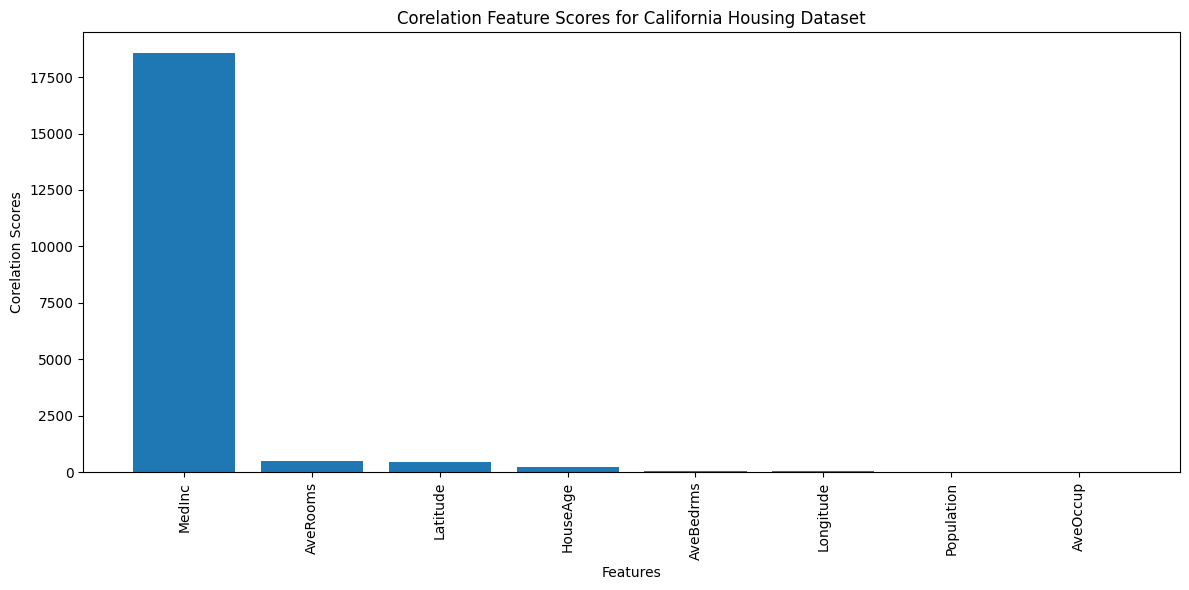

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.feature_selection import SelectKBest, f_regression # Import f_regression

# Load the California Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Create an instance of SelectKBest with f_regression scoring and specify k
k_best = SelectKBest(score_func=f_regression, k=5)  # You can adjust the value of 'k' as needed # Use f_regression instead of r_regression

# Fit SelectKBest on the dataset
k_best.fit(X, y)

# Get the indices of the selected features
selected_feature_indices = np.where(k_best.get_support())[0]

# Get the feature names and F-statistic scores
feature_names = data.feature_names
feature_scores = k_best.scores_

# Create a dataframe to store feature names and F-statistic scores
feature_df = pd.DataFrame({'Feature': feature_names, 'R-Statistic': feature_scores})

# Sort the dataframe by F-statistic scores in descending order
feature_df = feature_df.sort_values(by='R-Statistic', ascending=False)

# Create a bar chart to visualize feature scores
plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_df)), feature_df['R-Statistic'])
plt.xlabel('Features')
plt.ylabel('Corelation Scores')
plt.title('Corelation Feature Scores for California Housing Dataset')
plt.xticks(range(len(feature_df)), feature_df['Feature'], rotation=90)
plt.tight_layout()

# Show the plot
plt.show()


In [3]:
feature_df

,Feature,R-Statistic
0,MedInc,18556.571631
2,AveRooms,487.757462
6,Latitude,438.005453
1,HouseAge,232.841479
3,AveBedrms,45.108576
7,Longitude,43.698976
4,Population,12.547410
5,AveOccup,11.635342


## SelectPercentile-Example

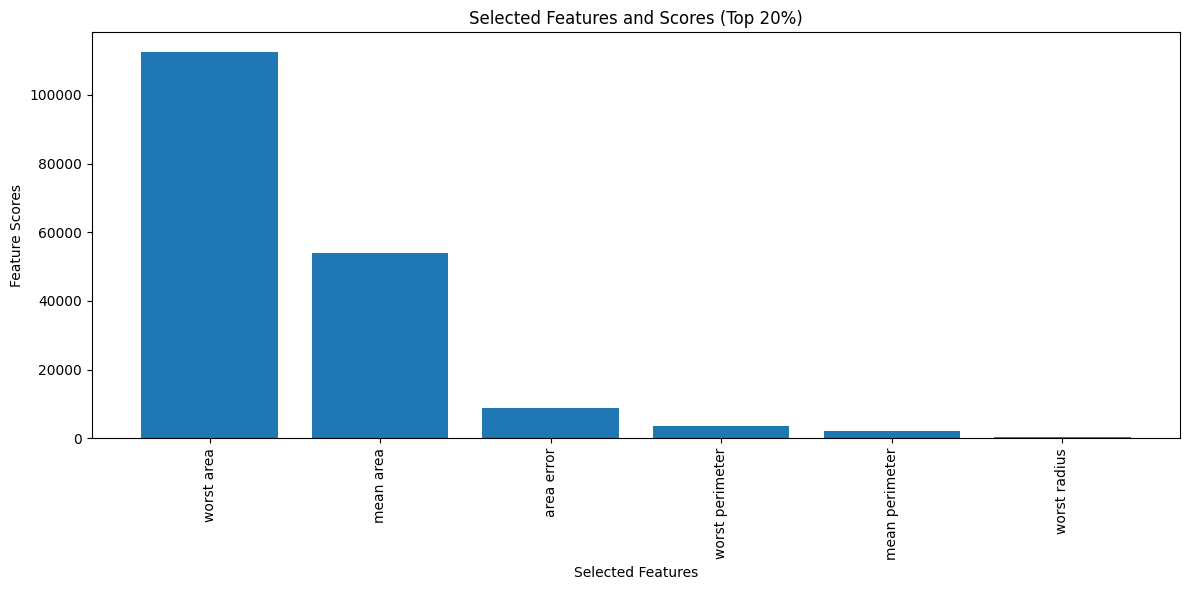

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, chi2

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Create an instance of SelectPercentile with a scoring function (e.g., chi-squared)
percentile = 20  # You can adjust the percentile as needed
select_percentile = SelectPercentile(score_func=chi2, percentile=percentile)

# Fit SelectPercentile on the dataset
select_percentile.fit(X, y)

# Get the selected feature indices and scores
selected_feature_indices = select_percentile.get_support(indices=True)
feature_scores = select_percentile.scores_

# Get the feature names
feature_names = data.feature_names

# Create a dataframe to store selected feature names and scores
selected_feature_df = pd.DataFrame({'Feature': [feature_names[i] for i in selected_feature_indices], 'Score': feature_scores[selected_feature_indices]})

# Sort the dataframe by scores in descending order
selected_feature_df = selected_feature_df.sort_values(by='Score', ascending=False)

# Create a bar chart to visualize selected feature scores
plt.figure(figsize=(12, 6))
plt.bar(range(len(selected_feature_df)), selected_feature_df['Score'])
plt.xlabel('Selected Features')
plt.ylabel('Feature Scores')
plt.title(f'Selected Features and Scores (Top {percentile}%)')
plt.xticks(range(len(selected_feature_df)), selected_feature_df['Feature'], rotation=90)
plt.tight_layout()

# Show the plot
plt.show()


## Generic Univariate
(Helps in Configuration)

In [5]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import GenericUnivariateSelect, chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of GenericUnivariateSelect with a scoring function (e.g., chi-squared)
k = 10  # You can adjust the percentile as needed
select = GenericUnivariateSelect(score_func=chi2, mode='k_best', param=10)

# Fit GenericUnivariateSelect on the training dataset
select.fit(X_train, y_train)

# Transform the training and testing datasets to select the top features
X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)

# Train a classifier (e.g., RandomForest) on the selected features
clf_selected = RandomForestClassifier(random_state=42)
clf_selected.fit(X_train_selected, y_train)

# Make predictions on the testing set using selected features
y_pred_selected = clf_selected.predict(X_test_selected)

# Calculate accuracy on the testing set using selected features
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print("Accuracy on the testing set using selected features:", accuracy_selected)

# Train a classifier on the original features
clf_original = RandomForestClassifier(random_state=42)
clf_original.fit(X_train, y_train)

# Make predictions on the testing set using original features
y_pred_original = clf_original.predict(X_test)

# Calculate accuracy on the testing set using original features
accuracy_original = accuracy_score(y_test, y_pred_original)
print("Accuracy on the testing set using original features:", accuracy_original)


Accuracy on the testing set using selected features: 0.9473684210526315
Accuracy on the testing set using original features: 0.9649122807017544
